#### Artificial Neural Network

#### Step 1: Data Preprocessing

In [71]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
mnist_data = tf.keras.datasets.mnist
(training_image, training_label), (test_image, test_label) = mnist_data.load_data()

In [73]:
training_image.shape

(60000, 28, 28)

In [74]:
Epoch = 20
Image_Size = (28,28)

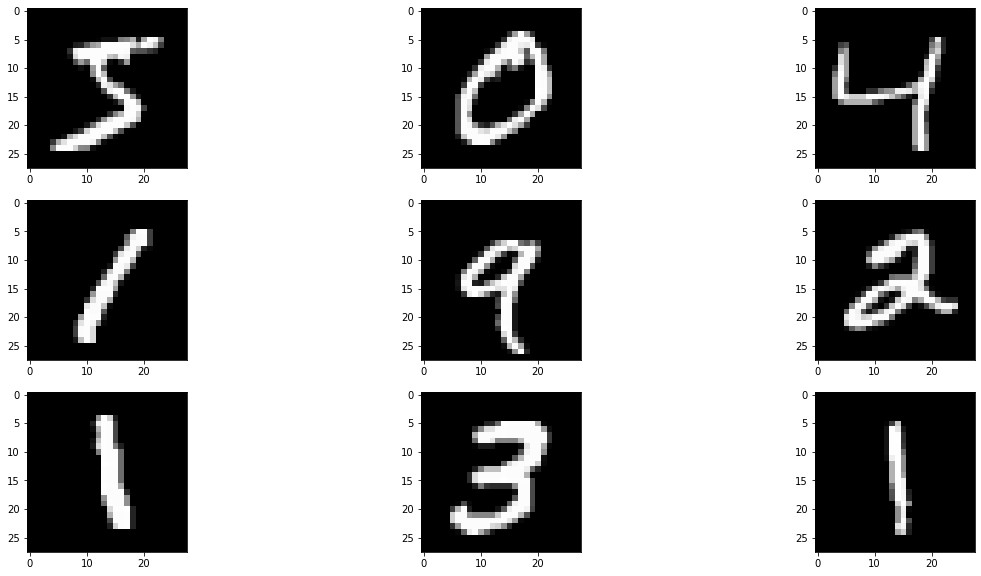

In [75]:
plt.figure(figsize=(20,10))
for i in range(9):
	plt.subplot(3, 3, i+1)
	plt.imshow(training_image[i], cmap=plt.get_cmap('gray'))

#### Step 2: Normalizing the data

In [76]:
training_images = training_image/255.0
testing_images = test_image/255.0

#### Step 3: Neural network model

In [77]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(256, activation = tf.nn.relu),
                            tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

#### Step 4: Compiling the model according to the optimizer, loss function and evaluation metric

In [78]:
model.compile(optimizer="adam", loss = 'sparse_categorical_crossentropy', metrics=["accuracy"])

#### Step 5: Defining callback class. If the accuracy is achieved before all epochs are completed, it is called to stop the training.

In [79]:
class terminate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy')>0.99:
            print("\nReached 99% accuracy so cancelling training!") 
            self.model.stop_training = True

#### Step 6: Training the model

In [80]:
callback = terminate()
train = model.fit(training_images, training_label, epochs=Epoch, callbacks=[callback])

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2215 - accuracy: 0.9355
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0914 - accuracy: 0.9722
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0606 - accuracy: 0.9811
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0439 - accuracy: 0.9865
Epoch 5/20
1849/1875 [============================>.] - ETA: 0s - loss: 0.0306 - accuracy: 0.9903
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0306 - accuracy: 0.9902


#### Step 7: Checking model summary

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (32, 784)                 0         
                                                                 
 dense_9 (Dense)             (32, 256)                 200960    
                                                                 
 dense_10 (Dense)            (32, 10)                  2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
